# Exploratory Data Analysis (EDA)

# Iris Dataset 

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [5]:
data=pd.read_csv("C:/Users/hp/Downloads/Iris.csv")

In [6]:
data.shape

(150, 6)

In [7]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
data.tail(3)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [9]:
del data['Species']
data.head(2)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2


In [10]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Id,150.0,75.500000,43.445368,1.0,38.25,75.50,112.75,150.0
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.10,5.80,6.40,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.80,3.00,3.30,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.60,4.35,5.10,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.30,1.30,1.80,2.5


In [11]:
data.reset_index(inplace=True)
data.head()

,index,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,0,1,5.1,3.5,1.4,0.2
1,1,2,4.9,3.0,1.4,0.2
2,2,3,4.7,3.2,1.3,0.2
3,3,4,4.6,3.1,1.5,0.2
4,4,5,5.0,3.6,1.4,0.2


C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

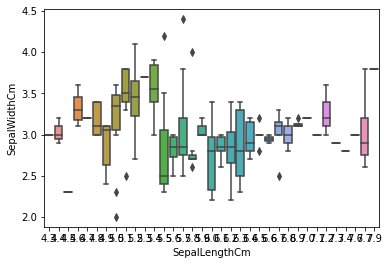

In [12]:
sns.boxplot(data["SepalLengthCm"],data["SepalWidthCm"])

Text(0.5, 0, 'SepalLengthCm and PetalLengthCm')

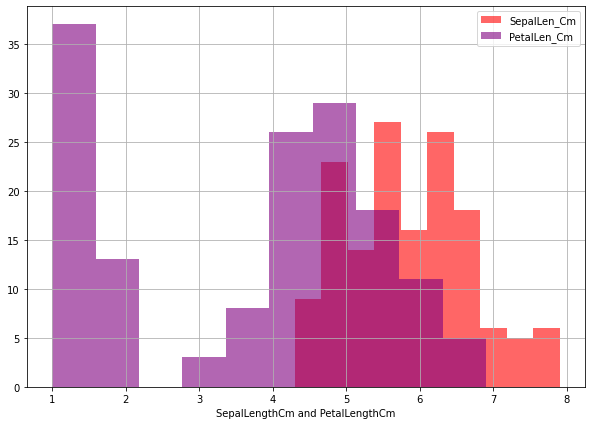

In [13]:
plt.figure(figsize=(10,7))
data['SepalLengthCm'].hist(alpha=0.6,color='red',label='SepalLen_Cm')
data['PetalLengthCm'].hist(alpha=0.6,color='purple',label='PetalLen_Cm')
plt.legend()
plt.xlabel('SepalLengthCm and PetalLengthCm')

Text(0.5, 0, 'SepalWidthCm and PetalWidthCm')

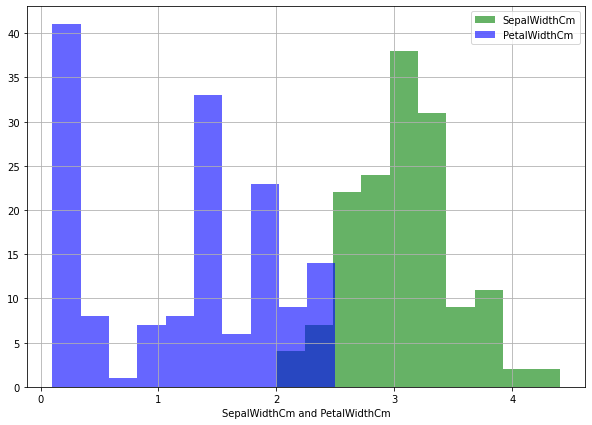

In [14]:
plt.figure(figsize=(10,7))
data['SepalWidthCm'].hist(alpha=0.6,color='green',label='SepalWidthCm')
data["PetalWidthCm"].hist(alpha=0.6,color="blue",label='PetalWidthCm')
plt.legend()
plt.xlabel('SepalWidthCm and PetalWidthCm')

Text(0, 0.5, 'SepalLengthCm')

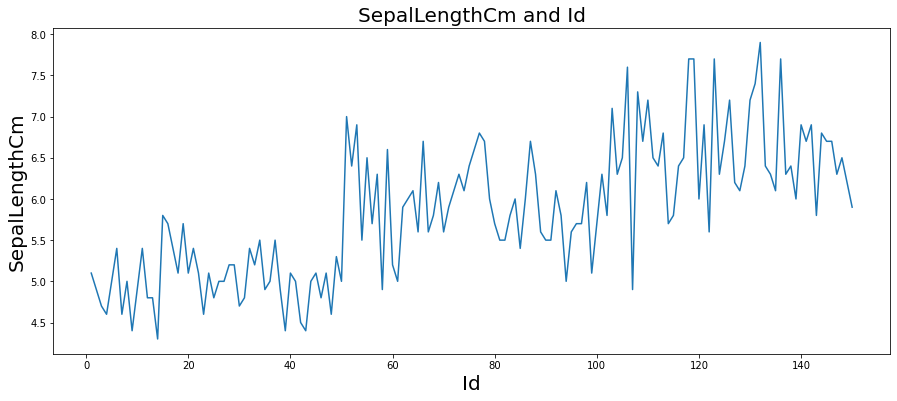

In [15]:
plt.figure(figsize=(15,6))
plt.plot(data["Id"],data["SepalLengthCm"])
plt.title("SepalLengthCm and Id",fontsize=20)
plt.xlabel("Id",fontsize=20)
plt.ylabel('SepalLengthCm',fontsize=20)

In [16]:
data["Id"].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150], dtype=int64)

In [17]:
data.corr()

,index,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
index,1.000000,1.000000,0.716676,-0.397729,0.882747,0.899759
Id,1.000000,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.899759,0.817954,-0.356544,0.962757,1.000000


Text(0.5, 1.0, 'Correlation')

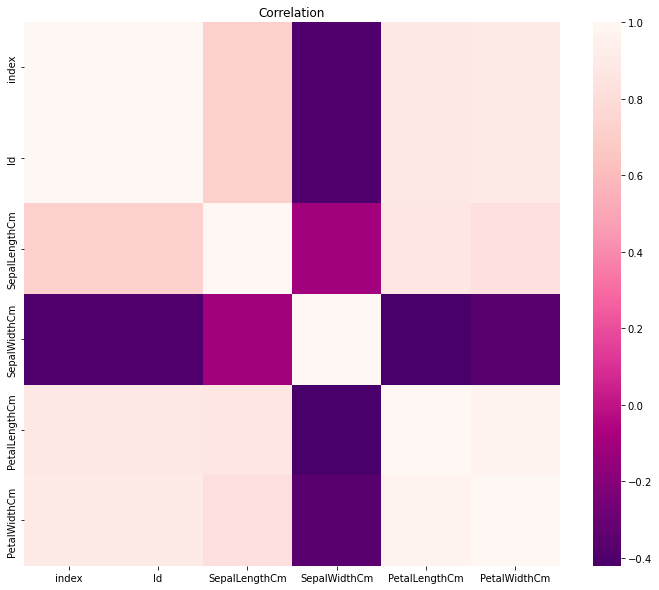

In [18]:
corr=data.corr()
fig = plt.figure(figsize=(12,10))
r = sns.heatmap(corr, cmap='RdPu_r')
r.set_title("Correlation")

In [19]:
data[(data['Id']%10)==0]

,index,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
9,9,10,4.9,3.1,1.5,0.1
19,19,20,5.1,3.8,1.5,0.3
29,29,30,4.7,3.2,1.6,0.2
39,39,40,5.1,3.4,1.5,0.2
49,49,50,5.0,3.3,1.4,0.2
59,59,60,5.2,2.7,3.9,1.4
69,69,70,5.6,2.5,3.9,1.1
79,79,80,5.7,2.6,3.5,1.0
89,89,90,5.5,2.5,4.0,1.3
99,99,100,5.7,2.8,4.1,1.3


In [20]:
data.columns

Index(['index', 'Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm',
       'PetalWidthCm'],
      dtype='object')

In [27]:
data_S=['index', 'Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm',
       'PetalWidthCm']

In [36]:
x=StandardScaler().fit_transform(data)

In [37]:
Kmeans=KMeans()
model=Kmeans.fit(x)

In [38]:
centers=model.cluster_centers_
centers

array([[ 0.11052379,  0.11052379, -0.3813903 , -1.34808756,  0.08307809,
        -0.01076826],
       [-1.10602688, -1.10602688, -0.94282652,  1.02199623, -1.28193428,
        -1.21008484],
       [ 1.0315554 ,  1.0315554 ,  1.97705575,  0.16429611,  1.44514709,
         1.11927322],
       [-0.05311741, -0.05311741,  0.41600969, -0.19437849,  0.43104204,
         0.30852324],
       [-1.30484061, -1.30484061, -0.45639898,  2.13764917, -1.29704352,
        -1.21071997],
       [ 1.14779784,  1.14779784,  0.3473479 , -0.72660531,  0.81393778,
         0.86290093],
       [-1.14189591, -1.14189591, -1.38535265, -0.03496756, -1.3381132 ,
        -1.33488889],
       [ 1.27495357,  1.27495357,  0.91683689,  0.26978863,  0.99691154,
         1.35515119]])